In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from exp import CoupledPendula

In [3]:
def simulate_pendula(n_samples, n_pendula, sanity_check = False):
    # simulate a chain of coupled pendula with the following parameters
    # the parameters are explained in the exp.py file
    pend = CoupledPendula(Tmax = 2)
    
    ω0 = torch.tensor([10.]*n_pendula).repeat(n_samples,1)
    ωd = torch.tensor([0.]*n_pendula).repeat(n_samples,1)
    Ad = torch.tensor([0.]*n_pendula).repeat(n_samples,1)
    v0 = torch.tensor([0.]*n_pendula).repeat(n_samples,1)
    coupling = torch.tensor([10.]*n_pendula).repeat(n_samples,1)
    γ = torch.tensor([0.]*n_pendula).repeat(n_samples,1)
    encoding_amplitude = torch.tensor(1.).repeat(n_samples,1)
    phid = torch.tensor([0.]*n_pendula).repeat(n_samples,1)

    # set initial angles (in rad)
    if not sanity_check:
        # i.e. initial theta uniformly random between -pi/2 to pi/2
        theta_initial = torch.rand([n_samples,n_pendula])*np.pi - np.pi/2
    else:
        # i.e. initial theta uniformly random between -pi/10 and pi/10
        theta_initial = (torch.rand([n_samples,n_pendula])*np.pi - np.pi/2) / 5

    # propagate through setup. The "full=True" parameter determines that the full
    # time evolution of the pendula is returned instead of just the final angle.
    theta = pend(theta_initial, ω0, ωd, Ad, v0, coupling, γ, encoding_amplitude, phid, full = True)
    return theta

In [4]:
theta = simulate_pendula(n_samples = 10000, n_pendula = 1)
np.savez('single_pendulum.npz',
         theta = theta)

In [5]:
theta = simulate_pendula(n_samples = 50000, n_pendula = 10)
np.savez('10pendula.npz',
         theta = theta)
data = np.load('10pendula.npz')
for key, val in data.items():
    print(key)
    exec(key + '=val')

theta


In [5]:
theta = simulate_pendula(n_samples = 50000, n_pendula = 10, sanity_check = True)
np.savez('10pendula_sanity_check.npz',
         theta = theta)
data = np.load('10pendula_sanity_check.npz')
for key, val in data.items():
    print(key)
    exec(key + '=val')

theta


In [9]:
theta.shape

(60, 50000, 10, 2)

Read the above as: Theta is an array with a time series of 60 points for 50000 different initial conditions of 10 pendula. The last dimension is 2 as it  contains position (0) and velocity (1) for each pendulum.

Here is plotted, for example, the evolution of the position (angle) over time of the 2nd pendulum in the 121st sample:

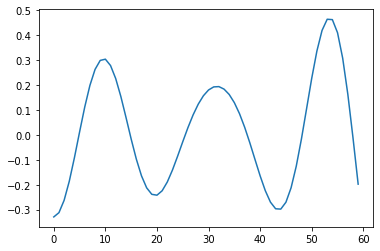

In [11]:
plt.plot(theta[:, 111, 3, 0])